## 模型驗證

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
predicted = clf.predict(iris.data)

In [20]:
import numpy 
na = numpy.array([True,False,True])
sum(na)

2

In [21]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.96

In [23]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
m= confusion_matrix(iris.target, predicted)
m

[0 1 2]


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


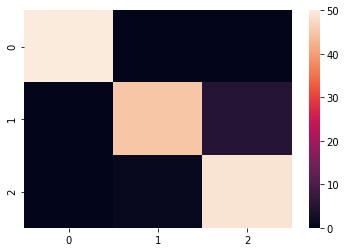

In [24]:
%pylab inline

import seaborn
seaborn.heatmap(m)

In [26]:
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data
y = iris.target

In [62]:
import random
random.seed(123)
random.randint(1,100)
print(random.sample(range(42),k=6))
print(random.sample(range(42),k=6))
print(random.sample(range(42),k=6))

[17, 5, 26, 41, 6, 2]
[24, 34, 35, 21, 38, 3]
[10, 8, 21, 35, 39, 15]


In [63]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size =0.33, random_state = 123)

In [65]:
train_X.shape

(100, 4)

In [66]:
test_X.shape

(50, 4)

In [68]:
train_y.shape

(100,)

In [69]:
test_y.shape

(50,)

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
predicted = clf.predict(test_X)

In [73]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(test_X)
accuracy_score(test_y, predicted)

0.96

In [74]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(test_y, predicted)
m

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]], dtype=int64)

In [79]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

acc = []
for train, test in kf.split(X):
    train_X, test_X, train_y, test_y = X[train], X[test], y[train], y[test]
    
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    
    predicted = clf.predict(test_X)
    
    acc.append(accuracy_score(test_y, predicted))


In [81]:
sum(acc) / len(acc)

0.96

In [83]:
np_acc = np.array(acc)
np_acc.mean()

0.96

In [85]:
np_acc.var()

0.0028444444444444433

In [86]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X=iris.data, y=iris.target, cv= 10)


In [88]:
acc

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [89]:
acc.mean()

0.96

In [90]:
acc.std()

0.044221663871405324

In [92]:
from sklearn.model_selection import LeaveOneOut
res = []
loo = LeaveOneOut()
for train, test in loo.split(X):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train],y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted == test_y).tolist())
sum(res) /  len(res)

0.96

In [94]:
import inspect
lines = inspect.getsource(LeaveOneOut)
print(lines)

class LeaveOneOut(BaseCrossValidator):
    """Leave-One-Out cross-validator

    Provides train/test indices to split data in train/test sets. Each
    sample is used once as a test set (singleton) while the remaining
    samples form the training set.

    Note: ``LeaveOneOut()`` is equivalent to ``KFold(n_splits=n)`` and
    ``LeavePOut(p=1)`` where ``n`` is the number of samples.

    Due to the high number of test sets (which is the same as the
    number of samples) this cross-validation method can be very costly.
    For large datasets one should favor :class:`KFold`, :class:`ShuffleSplit`
    or :class:`StratifiedKFold`.

    Read more in the :ref:`User Guide <cross_validation>`.

    Examples
    --------
    >>> from sklearn.model_selection import LeaveOneOut
    >>> X = np.array([[1, 2], [3, 4]])
    >>> y = np.array([1, 2])
    >>> loo = LeaveOneOut()
    >>> loo.get_n_splits(X)
    2
    >>> print(loo)
    LeaveOneOut()
    >>> for train_index, test_index in loo.split(X):
 

## 建立 ROC 曲線

In [104]:
from sklearn.tree import DecisionTreeClassifier
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
#clf.predict_proba(X)


| TP |  FP
|--------|--------|
| FN |  TN

|      | 非流失  | 流失   |
|------|--------|--------|
| 預測非流失 |10000 | 2000 |
|  預測流失  |1000  | 1000 |


- 流失留客成本: 2000$
- (1000 + 1000) * 2000

---------------------------------

- 流失客戶價值: 12000
- (2000 + 1000 ) * 12000

In [108]:
(1000 + 1000) * 2000 + (2000 + 1000 ) * 12000

40000000


|      | 非流失  | 流失   |
|------|--------|--------|
| 預測非流失 |10000 | 1000 |
|  預測流失  |2000  | 1000 |

- 流失留客成本: 2000$
- (2000 + 1000) * 2000

--------------------------------

- 流失客戶價值: 12000
- (1000 + 1000 ) * 12000

In [110]:
(2000 + 1000) * 2000 + (1000 + 1000 ) * 12000

30000000

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

X = iris.data[50:150,:]

le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [159]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [161]:
# probability to predict virginica 
proba = clf.predict_proba(X)[:,1] > 0.3
proba

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [162]:
proba == y

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [163]:
confusion_matrix(y, proba)

array([[41,  9],
       [ 0, 50]], dtype=int64)

In [164]:
TP = 41
FP = 9
FN = 0
TN = 50

In [165]:
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
FPR, TPR

(0.15254237288135594, 1.0)

In [166]:
import pandas
TPR_ary = [0]
FPR_ary = [0]

for threshold in np.arange(0,1,0.1):
    proba = clf.predict_proba(X)[:,1] > threshold
    m     = confusion_matrix(y, proba)
    TP = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TN = m[1,1]
    
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    if pandas.notnull(FPR) and pandas.notnull(TPR):
        print(threshold, TPR, FPR)
        TPR_ary.append(TPR)
        FPR_ary.append(FPR)
        
TPR_ary.append(1)
FPR_ary.append(1)


0.1 1.0 0.40476190476190477
0.2 1.0 0.2753623188405797
0.30000000000000004 1.0 0.15254237288135594
0.4 1.0 0.09090909090909091
0.5 1.0 0.05660377358490566
0.6000000000000001 0.9074074074074074 0.021739130434782608
0.7000000000000001 0.8448275862068966 0.023809523809523808
0.8 0.7575757575757576 0.0
0.9 0.5952380952380952 0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [175]:
fpr_ary = np.array(FPR_ary)
tpr_ary = np.array(TPR_ary)

In [174]:
fpr_ary.argsort()

array([ 0,  8,  9,  6,  7,  5,  4,  3,  2,  1, 10], dtype=int64)

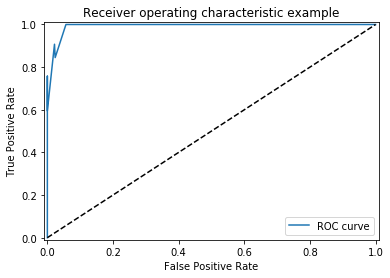

In [177]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary[fpr_ary.argsort()], tpr_ary[fpr_ary.argsort()],label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [178]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris = load_iris()
X = iris.data[50:150,]
le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [179]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
clf.fit(train_X,train_y)
probas_ = clf.predict_proba(test_X)
#probas_[:, 1]

In [181]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, probas_[:,1])


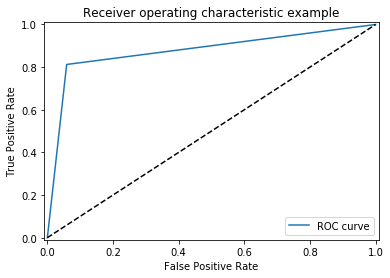

In [184]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [185]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.876838


In [186]:
clf2 = LogisticRegression()
clf2.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [187]:
clf2.fit(train_X,train_y)
probas2_ = clf2.predict_proba(test_X)

In [188]:
fpr2, tpr2, thresholds2 = roc_curve(test_y, probas2_[:,1])

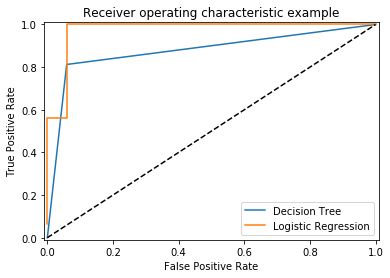

In [190]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='Decision Tree')
plt.plot(fpr2, tpr2,label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [191]:
from sklearn.metrics import auc
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.974265


## 比較不同模型

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

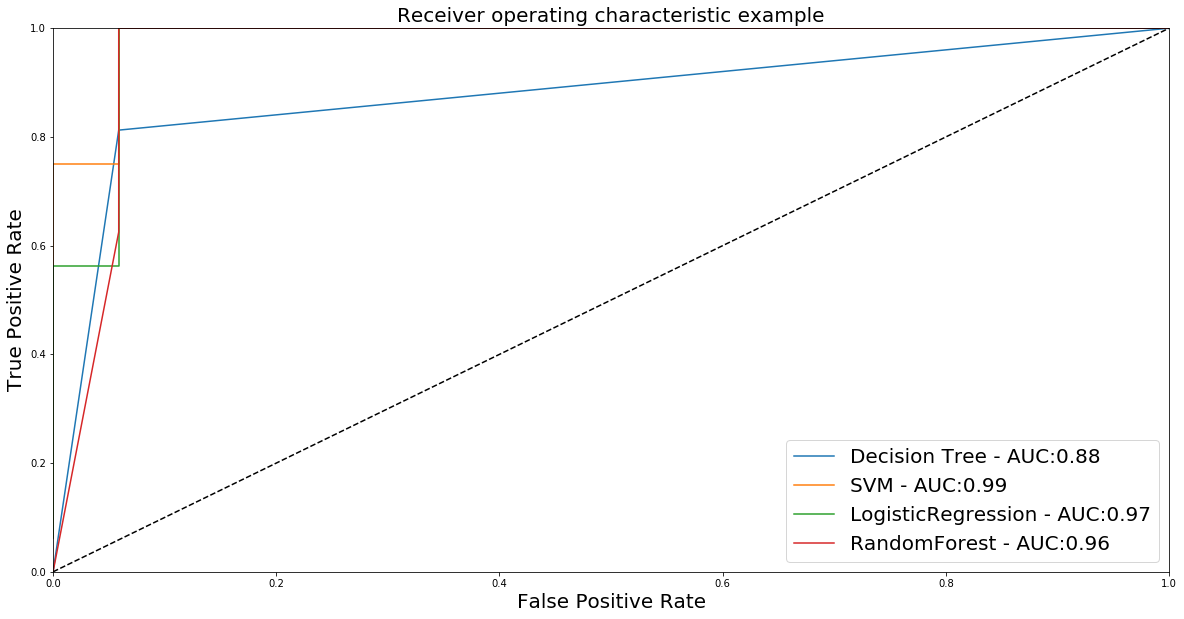

In [195]:
plt.figure(figsize= [20,10])

for clf, title in zip([clf1,clf2,clf3, clf4], \
            ['Decision Tree', 'SVM', 'LogisticRegression','RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)

plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


In [197]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

LabelEncoder()

In [200]:
le.transform([6,2,6,1])

array([2, 1, 2, 0], dtype=int64)

In [210]:
from sklearn import preprocessing
cat_features = ['color', 'director_name', 'actor_2_name']
enc = preprocessing.LabelEncoder()
enc.fit(cat_features)

new_cat_features = enc.transform(cat_features)

print(new_cat_features)


[1 2 0]


In [212]:
new_cat_features = new_cat_features.reshape(-1, 1) 
new_cat_features

array([[1],
       [2],
       [0]], dtype=int64)

In [214]:
ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
print(ohe.fit_transform(new_cat_features))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [215]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F',23], ['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [216]:
df.columns =['name', 'gender', 'age']

In [219]:
pandas.get_dummies(df['gender'])

,F,M
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0


In [220]:
df['gender']

0    M
1    F
2    M
3    M
4    F
5    F
Name: gender, dtype: object

In [222]:
enc = preprocessing.LabelEncoder()
enc.fit(df['gender'].values)

new_features = enc.transform(df['gender'].values)
new_features

array([1, 0, 1, 1, 0, 0], dtype=int64)

In [224]:
new_features = new_features.reshape(-1, 1) 

In [225]:
ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
ohe.fit_transform(new_features)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])